## Data processing

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
true_df = pd.read_csv('dataset_cleaved_uncleaved.csv',header = None)
unclear_df = pd.read_csv('dataset_middle.csv',header = None)
true_df.rename(columns = {100:'prot',101:'pept',102:'cst',103:'amber',104:'result'},inplace = True)
unclear_df.rename(columns = {100:'prot',101:'pept',102:'cst',103:'amber',104:'result'},inplace = True)

In [246]:
true_df.shape[0],unclear_df.shape[0]

(7342, 1383)

In [3]:
full_df = true_df.append(unclear_df)
full_df.shape[0]

8725

In [4]:
import numpy as np
length = len(full_df['result'])
train_index = []
test_index = []
for i in range(length):
    train_index.append(i) if np.random.rand() <= 0.7 else test_index.append(i)
train_df = full_df.iloc[train_index, :]
test_df = full_df.iloc[test_index, :]
print(train_df.shape[0],test_df.shape[0])

6082 2643


In [95]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,prot,pept,cst,amber,result
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-75.8827,-5.30558,0.487160,-15.20050,CLEAVED
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-76.0522,-2.99582,0.411164,-2.80525,CLEAVED
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-76.3756,-2.58024,0.406283,-2.32775,CLEAVED
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-76.1204,-2.29947,0.489585,-13.87525,CLEAVED
6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,-75.2412,-1.99082,0.440389,-2.97600,CLEAVED


## Scale

In [5]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
train_minMax = min_max_scaler.fit_transform(train_df[['prot','pept','cst','amber']])
test_minMax = min_max_scaler.fit_transform(test_df[['prot','pept','cst','amber']])

In [6]:
train_minMax_df = pd.DataFrame(train_minMax,columns = ['prot','pept','cst','amber'])
test_minMax_df = pd.DataFrame(test_minMax,columns = ['prot','pept','cst','amber'])

In [7]:
seq_index = range(0,100)
data_train = train_df.iloc[:,seq_index]
true_index = data_train.index
train_minMax_df.index = true_index
data_train['prot'] = train_minMax_df['prot']
data_train['pept'] = train_minMax_df['pept']
data_train['cst'] = train_minMax_df['cst']
data_train['amber'] = train_minMax_df['amber']
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,prot,pept,cst,amber
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.480869,0.194583,0.439990,0.396558
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.467161,0.397130,0.370918,0.559957
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.143640,0.406633,0.006201,0.577931
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.461645,0.458194,0.442194,0.414028
7,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0.471819,0.451078,0.408754,0.561028


In [8]:
data_test = test_df.iloc[:,seq_index]
true_test_index = data_test.index
test_minMax_df.index = true_test_index
data_test['prot'] = test_minMax_df['prot']
data_test['pept'] = test_minMax_df['pept']
data_test['cst'] = test_minMax_df['cst']
data_test['amber'] = test_minMax_df['amber']
data_test.head()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,prot,pept,cst,amber
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.514506,0.467733,0.408479,0.595054
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.483238,0.456519,0.353631,0.599996
6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0.573676,0.504917,0.383527,0.590425
11,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0.524838,0.438933,0.355828,0.598573
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.337625,0.195073,0.023845,0.601216


## Logistic Regression

In [74]:
from sklearn import linear_model
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
%matplotlib inline
lg = OneVsRestClassifier(linear_model.LogisticRegression(C = 1e30))
#,multi_class = 'multinomial',solver = 'saga'
lg.fit(data_train, train_df['result']) #Train
total_lg = lg.predict_proba(data_test) #Predict using model
pred_test = lg.predict(data_test)
result_lg = total_lg[:, 2]
np.mean(pred_test == test_df['result'])

0.799470298902762

In [20]:
result_lg = total_lg[:, 0]
result_lg

array([0.79407245, 0.91771395, 0.83128123, ..., 0.13107065, 0.01103366,
       0.15505805])

In [21]:
total_lg

array([[0.79407245, 0.19534128, 0.01058627],
       [0.91771395, 0.07590755, 0.0063785 ],
       [0.83128123, 0.12152384, 0.04719493],
       ...,
       [0.13107065, 0.64395153, 0.22497782],
       [0.01103366, 0.20394595, 0.78502039],
       [0.15505805, 0.43526725, 0.40967471]])

In [78]:
mu_test_df = test_df.copy()
#mu_test_df = test_df[test_df['result']=='CLEAVED'or test_df['result']=='UNCLEAVED']
mu_test_df['result'][mu_test_df['result']=='MIDDLE'] = 'UNCLEAVED'
#mu_test_df = mu_test_df[mu_test_df['result']!='MIDDLE']

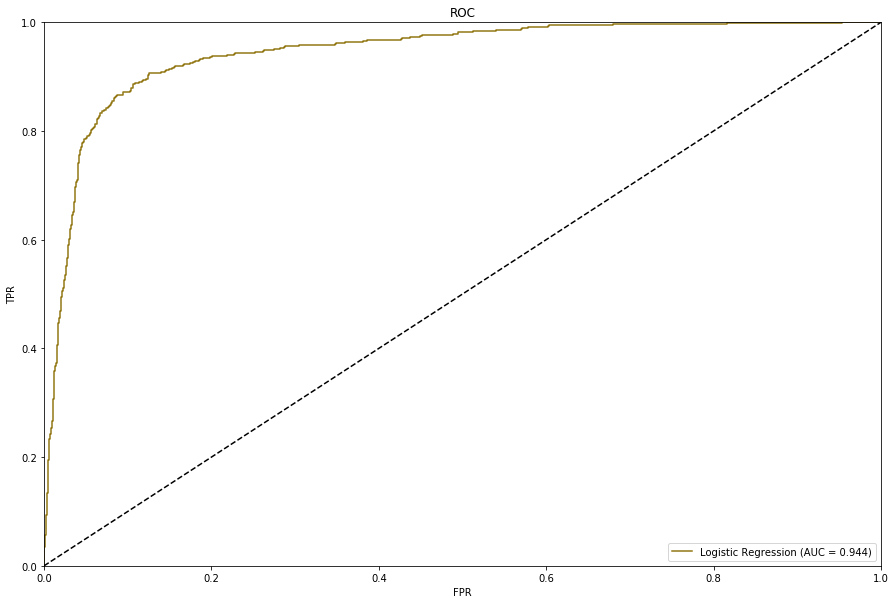

In [79]:
def plotROC(preds, truth, classification, name):
    fpr, tpr, thresholds = roc_curve(truth, preds , pos_label = classification)
    roc_auc = auc(fpr, tpr)
    # chooses a random color for plotting
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    #create the plot
    plt.plot(fpr, tpr, color = c, label = name + ' (AUC = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    
    return roc_auc

# Plot ROC for both models
fig = plt.figure(figsize = (15, 10))
plotROC(total_lg[:,0], mu_test_df['result'],'CLEAVED','Logistic Regression')
plt.show()

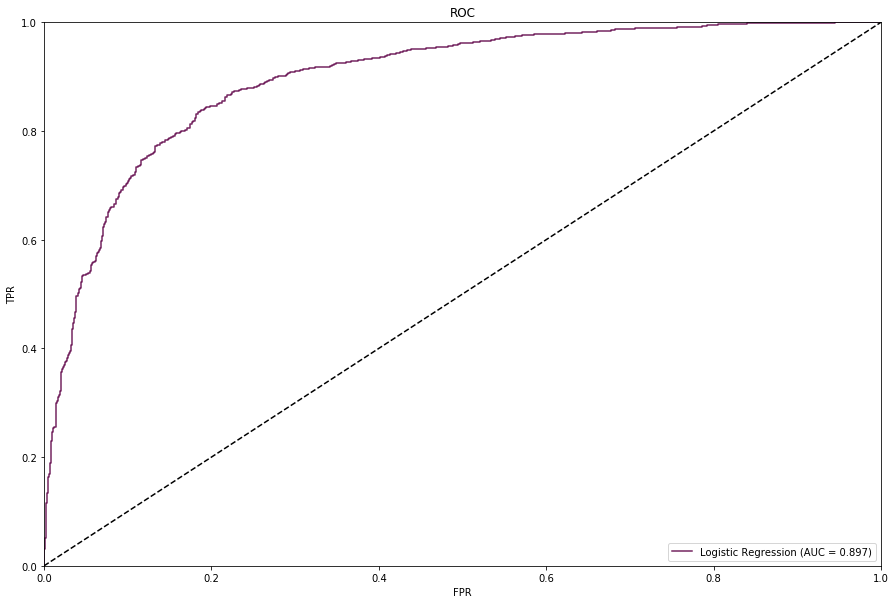

In [81]:
mc_test_df = test_df.copy()
mc_test_df['result'][mc_test_df['result']=='MIDDLE'] = 'CLEAVED'
fig = plt.figure(figsize = (15, 10))
plotROC(total_lg[:,2], mc_test_df['result'],'UNCLEAVED','Logistic Regression')
plt.show()

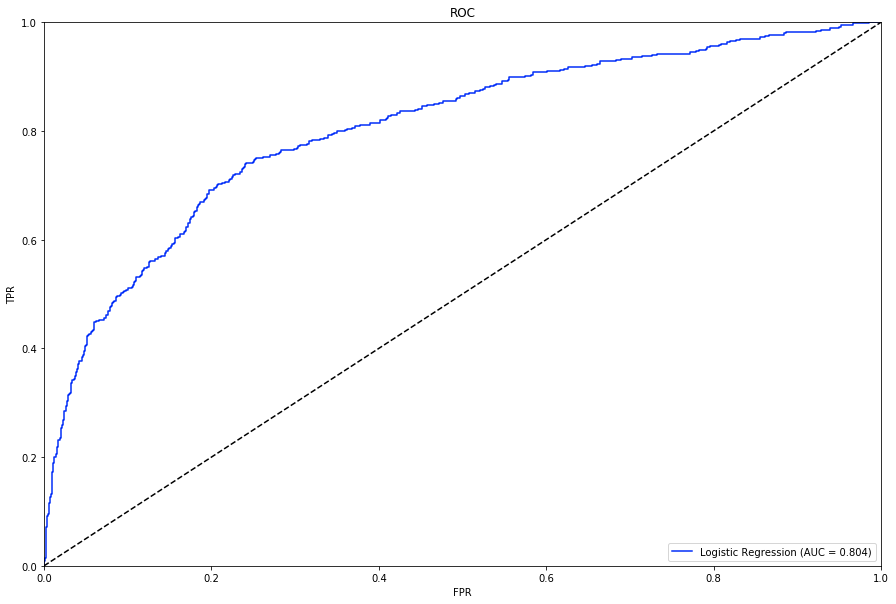

In [86]:
mm_test_df = test_df.copy()
mm_test_df['result'][mm_test_df['result']=='UNCLEAVED'] = 'CLEAVED'
fig = plt.figure(figsize = (15, 10))
plotROC(total_lg[:,1], mm_test_df['result'],'MIDDLE','Logistic Regression')
plt.show()

## Decision Tree and SVM

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

DT = OneVsRestClassifier(DecisionTreeClassifier(random_state=0))
#criterion = 'entropy', min_samples_split = 2000, min_samples_leaf = 200)
DT.fit(data_train, train_df['result'])
total_DT = DT.predict_proba(data_test)
result_DT = total_DT[:, 0]

svm = OneVsRestClassifier(svm.SVC(kernel = "linear"))
#,decision_function_shape = 'ovo'
svm.fit(data_train, train_df['result'])
#total_svm = svm.predict_proba(data_test.drop(['result'], axis = 1))
result_svm = svm.decision_function(data_test)


In [101]:
from sklearn.ensemble import RandomForestClassifier
rf = OneVsRestClassifier(RandomForestClassifier())
rf.fit(data_train,train_df['result'])
total_rf = rf.predict_proba(data_test)
result_rf = total_rf[:,0]
np.mean(rf.predict(data_test) == test_df['result'])

0.756337495270526

In [125]:
np.mean(DT.predict(data_test)==test_df['result'])

0.7196367763904654

In [89]:
np.mean(svm.predict(data_test) == test_df['result'])

0.7650397275822929

In [136]:
converted_DT = np.nan_to_num(total_DT)
converted_DT

array([[0.5, 0.5, 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       ...,
       [0. , 0.5, 0.5],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ]])

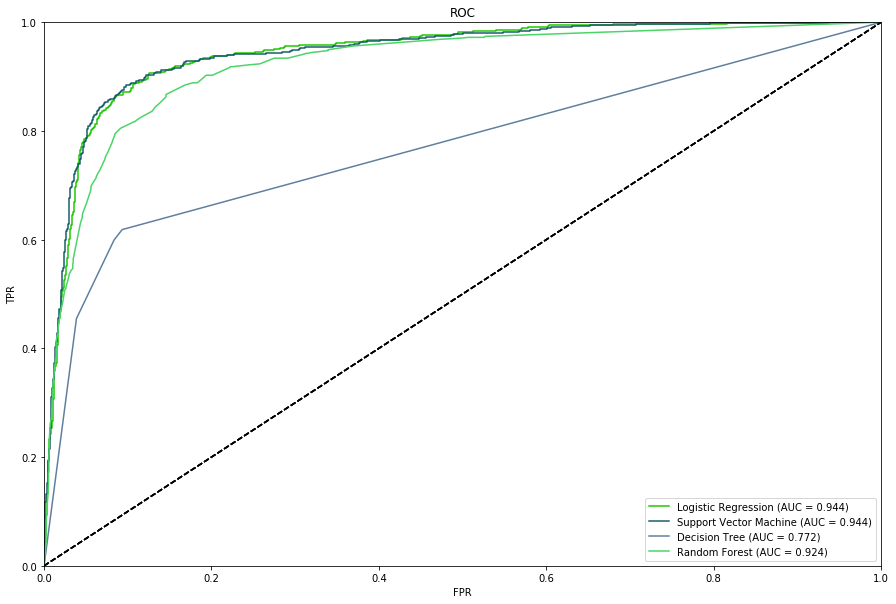

In [137]:
#Plot,ovr
fig = plt.figure(figsize = (15, 10))
plotROC(total_lg[:,0], mu_test_df['result'], 'CLEAVED','Logistic Regression')
plotROC(result_svm[:,0], mu_test_df['result'], 'CLEAVED','Support Vector Machine')
plotROC(converted_DT[:,0], mu_test_df['result'], 'CLEAVED','Decision Tree')
plotROC(result_rf, mu_test_df['result'], 'CLEAVED','Random Forest')
plt.show()

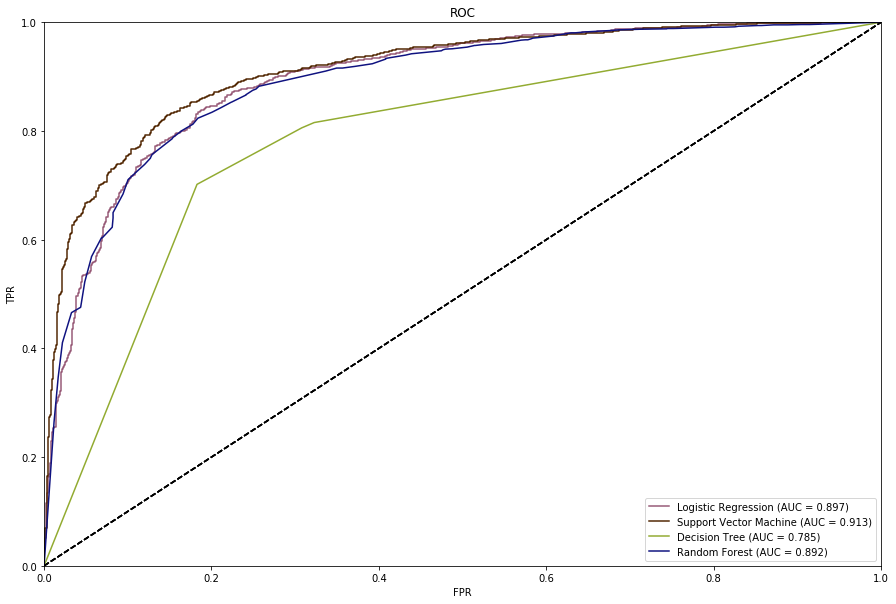

In [138]:
#Plot,ovr
fig = plt.figure(figsize = (15, 10))
plotROC(total_lg[:,2], mc_test_df['result'], 'UNCLEAVED','Logistic Regression')
plotROC(result_svm[:,2], mc_test_df['result'], 'UNCLEAVED','Support Vector Machine')
plotROC(converted_DT[:,2], mc_test_df['result'], 'UNCLEAVED','Decision Tree')
plotROC(total_rf[:,2], mc_test_df['result'], 'UNCLEAVED','Random Forest')
plt.show()

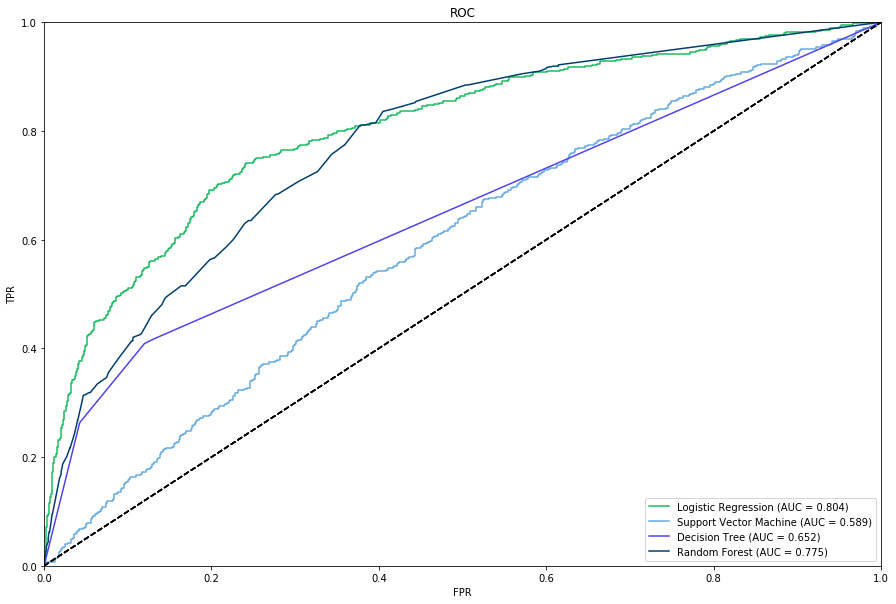

In [139]:
#Plot,ovr
fig = plt.figure(figsize = (15, 10))
plotROC(total_lg[:,1], mm_test_df['result'], 'MIDDLE','Logistic Regression')
plotROC(result_svm[:,1], mm_test_df['result'], 'MIDDLE','Support Vector Machine')
plotROC(converted_DT[:,1], mm_test_df['result'], 'MIDDLE','Decision Tree')
plotROC(total_rf[:,1], mm_test_df['result'], 'MIDDLE','Random Forest')
plt.show()

In [99]:
len(train_df[train_df['result']=='CLEAVED']),len(train_df[train_df['result']=='UNCLEAVED']),len(train_df[train_df['result']=='MIDDLE'])

(1358, 3774, 950)

## Feature Selection

In [155]:
seq_train = train_df.iloc[:,seq_index]
seq_test = test_df.iloc[:,seq_index]

In [239]:
#Do Logr, DT, SVM again
lg = linear_model.LogisticRegression(C = 1e30,multi_class = 'multinomial',solver = 'saga') 
lg.fit(seq_train, train_df['result']) #Train
total_lg_seq = lg.predict_proba(seq_test) #Predict using model
pred_test_seq = lg.predict(seq_test)
result_lg_seq = total_lg_seq[:, 0]
np.mean(pred_test_seq == test_df['result'])

0.8114689709347996

In [240]:
DT.fit(seq_train, train_df['result'])
total_DT_seq = DT.predict_proba(seq_test)
result_DT_seq = total_DT_seq[:, 0]

svm.fit(seq_train, train_df['result'])
#total_svm = svm.predict_proba(data_test.drop(['result'], axis = 1))
result_svm_test = svm.decision_function(seq_test)
np.mean(DT.predict(seq_test)==test_df['result'])

0.6991358994501178

In [238]:
np.mean(svm.predict(seq_test) == test_df['result'])

0.8212882953652789

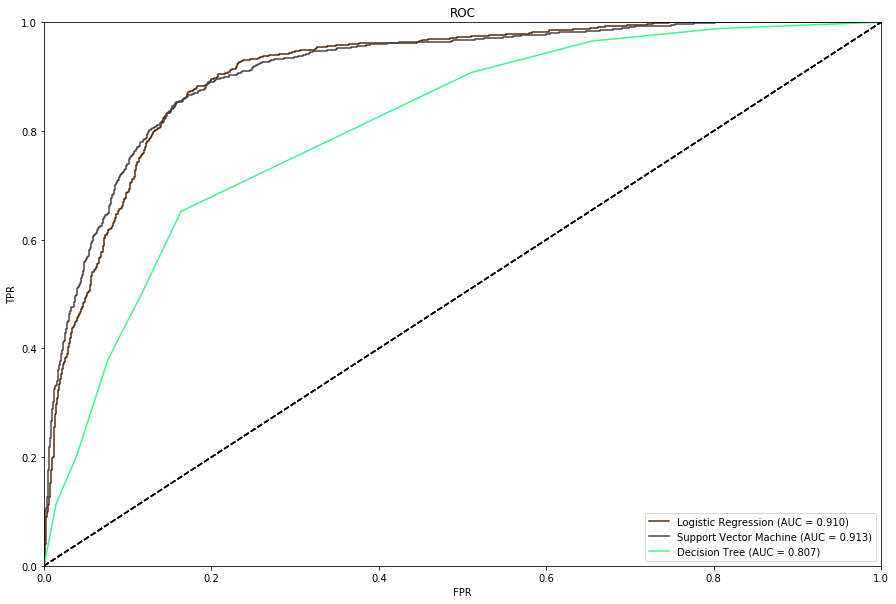

In [243]:
#Plot
fig = plt.figure(figsize = (15, 10))
plotROC(result_lg_seq, mu_test_df['result'], 'CLEAVED','Logistic Regression')
plotROC(result_svm_test[:,1], mu_test_df['result'], 'CLEAVED','Support Vector Machine')
plotROC(result_DT_seq, mu_test_df['result'], 'CLEAVED','Decision Tree')
plt.show()

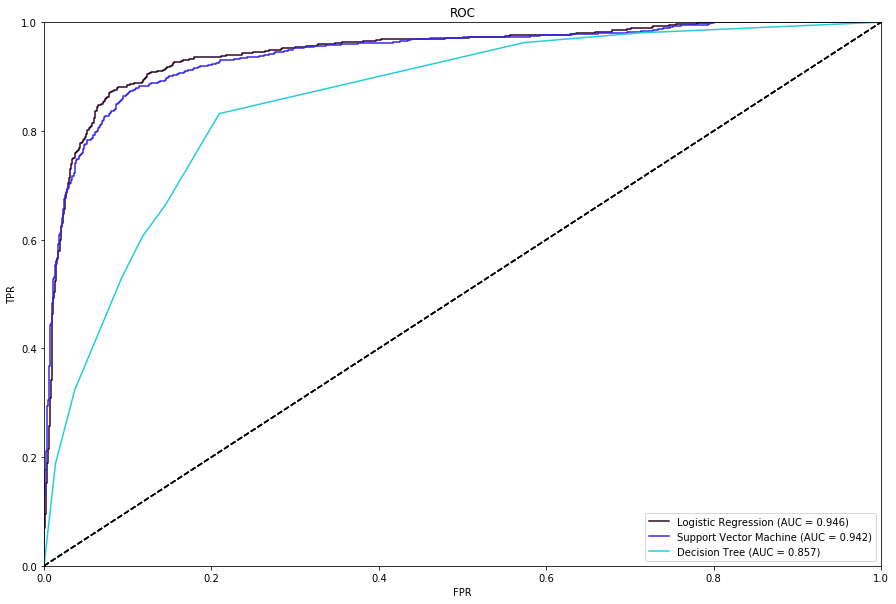

In [244]:
#Plot
fig = plt.figure(figsize = (15, 10))
plotROC(result_lg_seq, mc_test_df['result'], 'CLEAVED','Logistic Regression')
plotROC(result_svm_test[:,1], mc_test_df['result'], 'CLEAVED','Support Vector Machine')
plotROC(result_DT_seq, mc_test_df['result'], 'CLEAVED','Decision Tree')
plt.show()